In [1]:
# 패키지 import
import pandas as pd
import matplotlib.pyplot as plt

## A. 데이터 전처리 - 데이터 읽어오기

- 특정 필드만 Pandas 의 Dataframe 으로 읽어옵니다.

In [2]:
# CSV 파일 경로 설정
csv_file = 'archive/NFLX.csv'

# CSV 파일을 DataFrame으로 읽어오기 (특정 필드만 읽어오기)
df = pd.read_csv(csv_file, usecols=['Date', 'Open', 'High', 'Low', 'Close'])

In [3]:
# DataFrame 출력
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


In [4]:
df.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

## B. 데이터 전처리 – 2021년 이후의 종가 데이터 출력하기
- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
- 기본 df['Close'] 타입은 object(문자열) 이므로, Date 형식으로 변환하여 필터링을 진행합니다.
- 필터링이 완료된 DataFrame 의 종가 데이터를 Matplotlib 를 사용하여 시각화합니다.

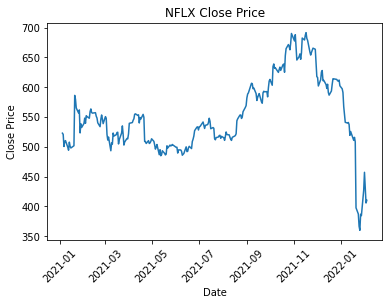

In [5]:
# CSV 파일을 DataFrame으로 읽어오기 (특정 필드만 읽어오기)
df = pd.read_csv(csv_file, usecols=['Date', 'Open', 'High', 'Low', 'Close'])

# 'Date' 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2021년 이후의 데이터 필터링
df = df[df['Date'] >= pd.to_datetime('2021-01-01')]

# Matplotlib을 사용하여 종가 데이터 시각화
plt.plot(df['Date'], df['Close'])

# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close Price')

# x축 눈금 라벨 회전 설정
plt.xticks(rotation=45)

# 그래프 출력
plt.show()

## C. 데이터 분석 – 2021년 이후 최고, 최저가 출력하기
- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
- 기본 df['Close'] 타입은 object(문자열) 이므로, Date 형식으로 변환하여 필터링을 진행합니다.
- 종가(Close) 필드를 활용하여, 2021년 이후 가장 높은 종가와 가장 낮은 종가를 출력합니다.

In [6]:
# CSV 파일을 DataFrame으로 읽어오기 (특정 필드만 읽어오기)
df = pd.read_csv(csv_file, usecols=['Date', 'Open', 'High', 'Low', 'Close'])

# 'Date' 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2021년 이후의 데이터 필터링
df = df[df['Date'] >= pd.to_datetime('2021-01-01')]

# 최고가 출력
max_price = df['Close'].max()
print("최고 종가:", max_price)

# 최저가 출력
min_price = df['Close'].min()
print("최저 종가:", min_price)

최고 종가: 691.690002
최저 종가: 359.700012


In [7]:
print("최고 종가:", max_price)
print("최저 종가:", min_price)

최고 종가: 691.690002
최저 종가: 359.700012


## D. 데이터 분석- 2021년 이후 월 별 평균 종가 출력하기
- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
- 기본 df['Close'] 타입은 object(문자열) 이므로, Date 형식으로 변환하여 필터링을 진행합니다.
- 월 별로 그룹화하여 평균 종가를 계산한 새로운 DataFrame 을 만듭니다. (groupby 활용)

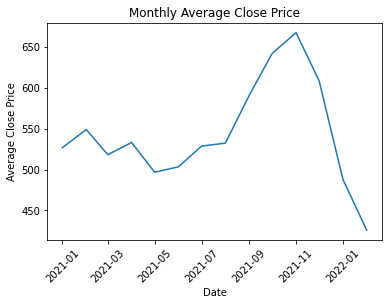

In [8]:
# CSV 파일을 DataFrame으로 읽어오기 (특정 필드만 읽어오기)
df = pd.read_csv(csv_file, usecols=['Date', 'Open', 'High', 'Low', 'Close'])

# 'Date' 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2021년 이후의 데이터 필터링
df = df[df['Date'] >= pd.to_datetime('2021-01-01')]

# 월별 평균 종가 계산 (numeric_only=True를 명시적으로 설정)
monthly_avg_close = df.groupby(df['Date'].dt.to_period('M')).mean(numeric_only=True)

# Date 열이 행으로 변경되었으므로, reset_index 를 통해 열로 다시 변경
monthly_avg_close.reset_index(inplace=True)

# 'Date' 컬럼을 datetime 형식으로 변환
monthly_avg_close['Date'] = monthly_avg_close['Date'].dt.to_timestamp()

# 월별 평균 종가 시각화
plt.plot(monthly_avg_close['Date'], monthly_avg_close['Close'])
plt.title('Monthly Average Close Price')
plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.xticks(rotation=45)


plt.show()

## E. 데이터 시각화 – 2022년 1월 이후 일 별 최고, 최저, 종가 시각화
- csv 파일을 DataFrame 으로 읽어와 2021년 이후의 데이터만 필터링합니다.
- 기본 df['Close'] 타입은 object(문자열) 이므로, Date 형식으로 변환하여 필터링을 진행합니다.
- Matplotlib 를 활용하여 3가지 필드를 한 번에 분석할 수 있도록 시각화합니다.

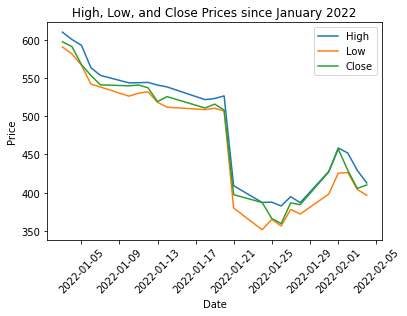

In [9]:
# CSV 파일을 DataFrame으로 읽어오기 (특정 필드만 읽어오기)
df = pd.read_csv(csv_file, usecols=['Date', 'Open', 'High', 'Low', 'Close'])

# 'Date' 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])

# 2022년 이후의 데이터 필터링
df = df[df['Date'] >= pd.to_datetime('2022-01-01')]

# 최고가, 최저가, 종가 시각화
plt.plot(df['Date'], df['High'], label='High')
plt.plot(df['Date'], df['Low'], label='Low')
plt.plot(df['Date'], df['Close'], label='Close')
plt.title('High, Low, and Close Prices since January 2022')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()


plt.show()